## Introduction
The Titanic dataset is popular for data analysis and machine learning. It contains information about the passengers onboard the Titanic, including features like age, gender, fare, cabin, and survival status. We will perform exploratory data analysis (EDA) on the Titanic dataset using Python in this project.

### 1. Importing Libraries:
Let’s start by importing the required libraries for data analysis and visualization:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 2. Loading the Dataset:
The Titanic dataset is available in the Seaborn library, so we can load it directly into a DataFrame:


In [3]:
df = pd.read_csv('titanic.csv')

### 3. Exploring the Data:
To gain initial insights into the dataset, we can perform some basic exploratory operations:

In [4]:
# Display the first few rows of the dataset
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Check the dimensions of the dataset
display(df.shape)
print('*'*25)

# Get summary statistics of numerical variables
display(df.describe())

# Check the data types of variables
print(f"{'*'*25} \n {df.dtypes}")

# Check for missing values
print(f"{'*'*25} \n {df.isnull().sum()}")


(891, 12)

*************************


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


************************* 
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
************************* 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 4. Data Cleaning:
Data cleaning is an essential step in EDA. We must handle missing values, outliers, and inconsistencies in the dataset. Some common data-cleaning tasks include:

In [6]:
# Handling missing values
df['Cabin'].dropna(inplace=True)  # Remove rows with missing values


In [7]:
print(df['Age'].mean())
print(df['Age'].median())
df['Age'].fillna(29, inplace=True)  # Fill missing values with a specific value


29.69911764705882
28.0


In [8]:
# Handling outliers
# Identify and remove outliers using statistical methods or domain knowledge

# Data transformation
# Perform necessary transformations like scaling, encoding, or feature engineering

### 5. Data Visualization:
Visualization helps us understand the data and identify patterns. We can create various types of plots using libraries like Matplotlib and Seaborn. Here are some examples:

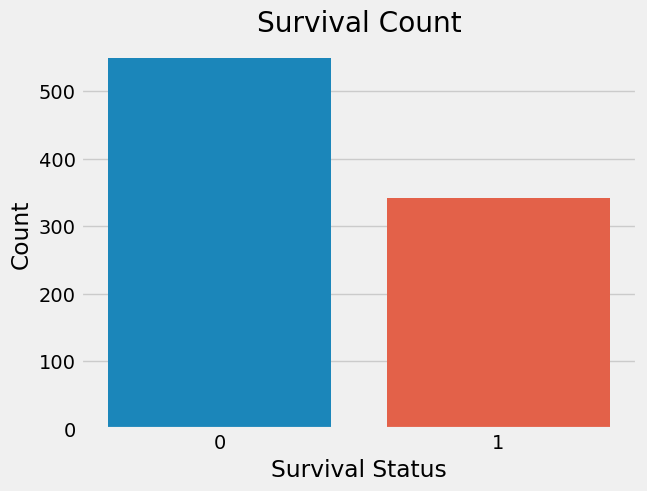

In [9]:
# Bar plot
sns.countplot(x='Survived', data=df)
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()


From the above graph it is clear that not many persons survived. Out of 891 persons in training dataset only 350, 38.4% of total training dataset survived. We will get more insight of data by exploring more.

In [10]:
# Here we'll explore features

df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

It is clear that 233 female survived out of 344. And out of 577 male 109 survived. The survival ratio of female is much greater than that of male. It can be seen clearly in following graph

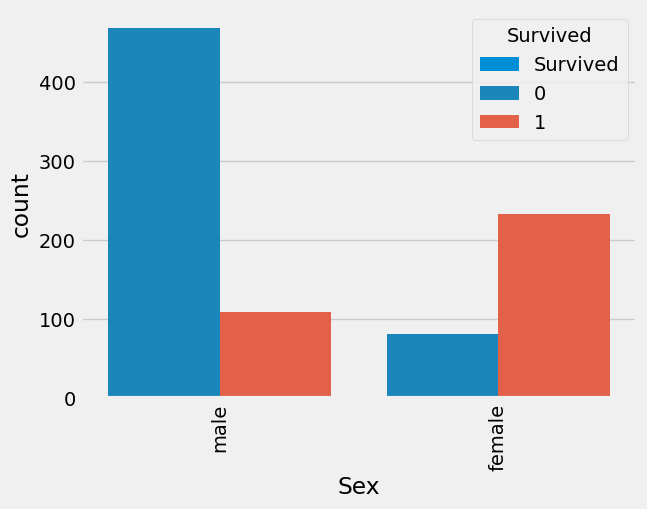

In [11]:
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot('Sex',hue='Survived',data=df,)
plt.show()

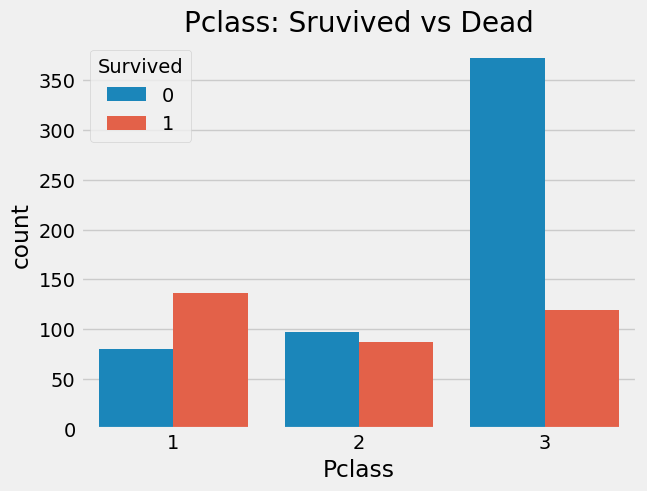

In [12]:
sns.countplot('Pclass', hue='Survived', data=df)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

It is clearly seen that pasangers of Class 1 are given high priority while Rescue. There are greater number of passangers in Class 3 than Class 1 and Class 2 but very few, almost 25% in Class 3 survived. In Class 2, survivail and non-survival rate is 49% and 51% approx. While in Class 1 almost 68% people survived.


In [13]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

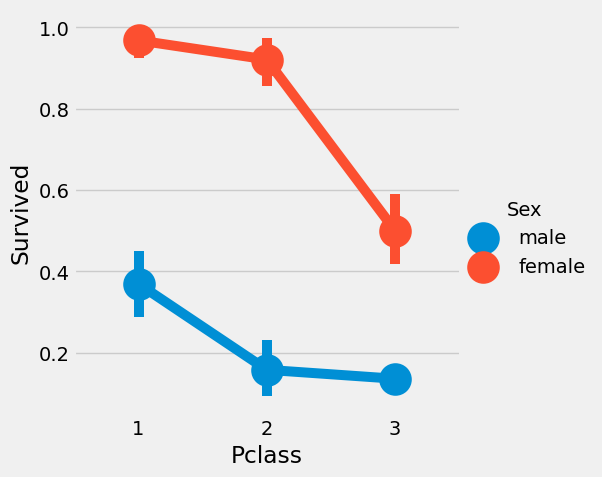

In [14]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df)
plt.show()

I use FactorPlot and CrossTab here because with these plots categorical variables can easily be visualized. Looking at FactorPlot and CrossTab, it is clear that women survival rate in Class 1 is about 95-96%, as only 3 out of 94 women died. So, it is now more clear that irrespective of Class, women are given first priority during Rescue. Because survival rate for men in even Class 1 is also very low. From this conclusion, PClass is also a important feature.

In [15]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.') #extracting Name initials

In [16]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


There are many names which are not relevant like Mr, Mrs etc. So I will replace them with some relevant names,

In [17]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
df.groupby('Initial')['Age'].mean()

Initial
Master     7.016750
Miss      23.241935
Mr        31.891304
Mrs       35.047244
Other     45.888889
Name: Age, dtype: float64

### Feature: SibSip
SibSip feature indicates that whether a person is alone or with his family. Siblings=brother,sister, etc and Spouse= husband,wife

In [19]:
pd.crosstab([df.SibSp],df.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


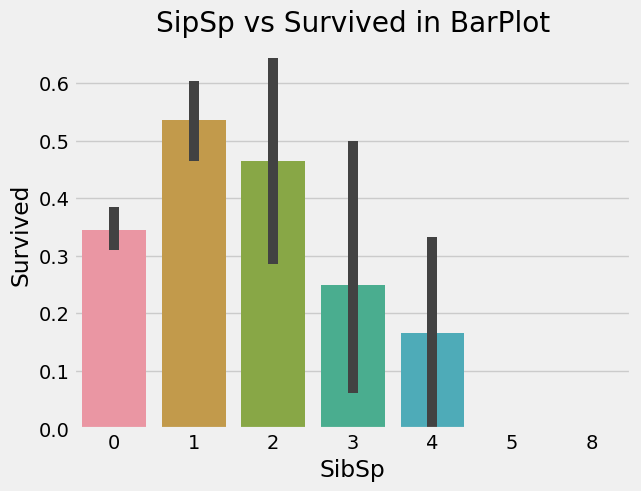

In [20]:
sns.barplot('SibSp','Survived', data=df)
plt.title('SipSp vs Survived in BarPlot')
plt.show()


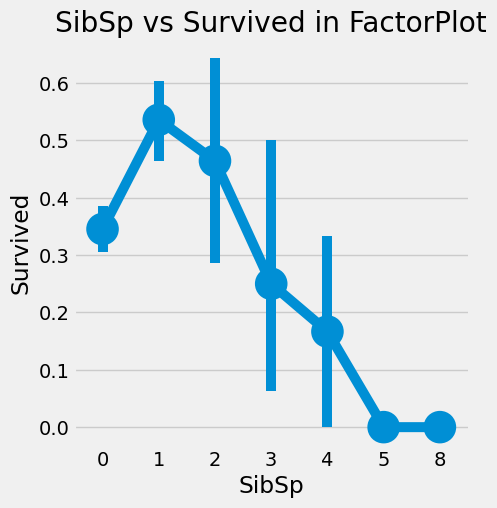

In [21]:
sns.factorplot('SibSp','Survived', data=df)
plt.title('SibSp vs Survived in FactorPlot')
plt.show()

In [22]:
pd.crosstab(df.SibSp,df.Pclass).style.background_gradient('summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


There are many interesting facts with this feature. Barplot and FactorPlot shows that if a passanger is alone in ship with no siblings, survival rate is 34.5%. The graph decreases as no of siblings increase. This is interesting because, If I have a family onboard, I will save them instead of saving myself. But there's something wrong, the survival rate for families with 5-8 members is 0%. Is this because of PClass? Yes this is PClass, The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

### 6. Exploring Relationships:
EDA involves exploring relationships between variables to uncover insights. We can use techniques like correlation analysis or cross-tabulation for this purpose.

In [23]:
# Correlation analysis
correlation = df[['Age', 'Fare']].corr()
print(correlation)

# Cross-tabulation
cross_tab = pd.crosstab(df['Pclass'], df['Survived'])
print(cross_tab)

           Age      Fare
Age   1.000000  0.093706
Fare  0.093706  1.000000
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


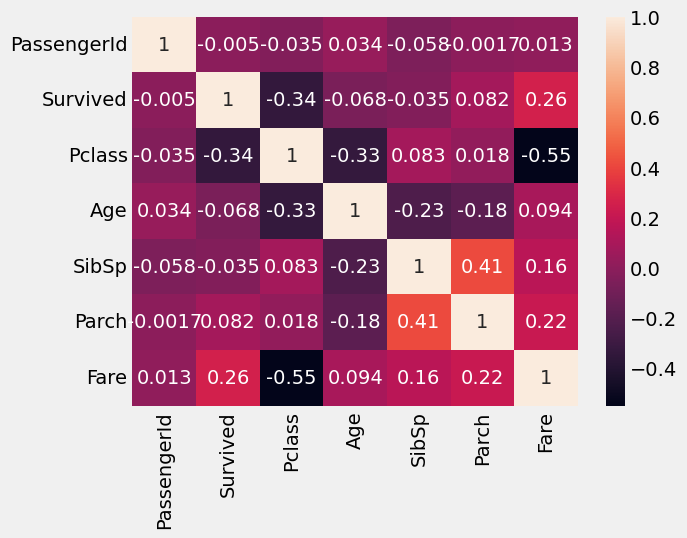

In [24]:
sns.heatmap(df.corr(),annot=True)
plt.show()